1. Load the CSV File:

In [17]:
import pandas as pd

#Load the meter data
df = pd.read_csv('C:\\Gama\\Projects\\JupiterNotebook\\ElectricMeterAnalysis\\data\\meter_data_large.csv')

#Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MeterID           10000 non-null  object 
 1   MeterGeoLocation  10000 non-null  object 
 2   Timestamp         10000 non-null  object 
 3   MeterUp           10000 non-null  int64  
 4   MeterDown         10000 non-null  int64  
 5   MeterMake         10000 non-null  object 
 6   MeterModel        10000 non-null  object 
 7   Latitude          10000 non-null  float64
 8   Longitude         10000 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 703.3+ KB
None
  MeterID   MeterGeoLocation            Timestamp  MeterUp  MeterDown  \
0  MTR036   Sector 6, Dallas  2024-11-18 11:03:00     1805        724   
1  MTR062  Sector 11, Dallas  2024-11-14 03:10:00     1313        528   
2  MTR046  Sector 13, Dallas  2024-11-09 08:35:00     1115        773   
3  MTR083  Sect

2. Check for Missing or Erroneous Data:

In [5]:
# Check for missing values
print(df.isnull().sum())

# Remove duplicates if any
df = df.drop_duplicates()

MeterID             0
MeterGeoLocation    0
Timestamp           0
MeterUp             0
MeterDown           0
MeterMake           0
MeterModel          0
Latitude            0
Longitude           0
dtype: int64


3. Understand the Data Types: Ensure data types (e.g., timestamps as datetime) are correct:

In [7]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print(df.dtypes)

MeterID                     object
MeterGeoLocation            object
Timestamp           datetime64[ns]
MeterUp                      int64
MeterDown                    int64
MeterMake                   object
MeterModel                  object
Latitude                   float64
Longitude                  float64
dtype: object


Step 3: Exploratory Data Analysis (EDA)
a) Descriptive Statistics:

In [8]:
print(df.describe())

                        Timestamp       MeterUp     MeterDown      Latitude  \
count                       10000  10000.000000  10000.000000  10000.000000   
mean   2024-11-15 20:45:15.468000   1499.154200    650.696700     32.777130   
min           2024-11-01 00:00:00   1000.000000    500.000000     32.726709   
25%           2024-11-08 07:40:00   1251.000000    574.000000     32.752231   
50%           2024-11-15 20:24:00   1501.000000    652.000000     32.777531   
75%           2024-11-23 07:01:15   1741.000000    726.000000     32.802217   
max           2024-11-30 23:39:00   2000.000000    800.000000     32.826696   
std                           NaN    286.479715     87.308328      0.028962   

          Longitude  
count  10000.000000  
mean     -96.797201  
min      -96.846993  
25%      -96.822168  
50%      -96.796956  
75%      -96.772654  
max      -96.747022  
std        0.028782  


b) Visualze Data Distribution.

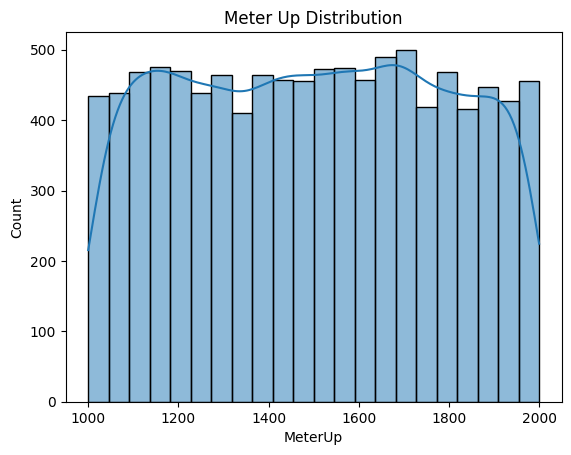

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Meter Up/Down distribution
sns.histplot(df['MeterUp'], kde=True)
plt.title("Meter Up Distribution")
plt.show()

c) Time-Based Analysis:

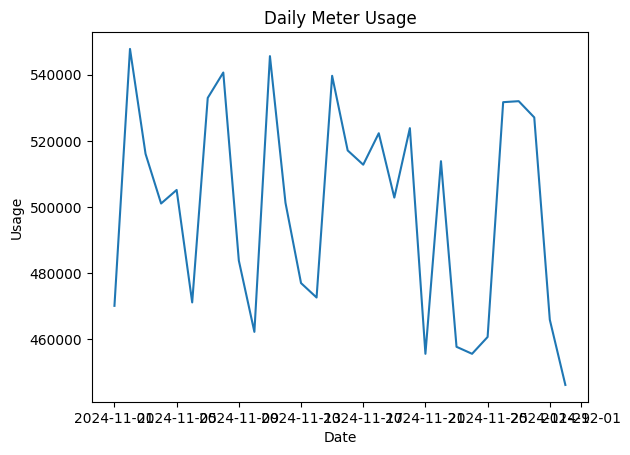

In [14]:
# Group by Timestamp for daily/monthly usage
df['Date'] = df['Timestamp'].dt.date
daily_usage = df.groupby('Date')['MeterUp'].sum()

daily_usage.plot(title="Daily Meter Usage", xlabel="Date", ylabel="Usage")
plt.show()


d) Geospatial Analysis (Optional): Use GeoPandas or Folium for meter location analysis:

In [16]:
import geopandas as gpd
import folium

# Assuming geo location columns are 'Latitude' and 'Longitude'
geo_df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

# Create a map
map = folium.Map(location=[geo_df['Latitude'].mean(), geo_df['Longitude'].mean()], zoom_start=10)
for _, row in geo_df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], tooltip=row['MeterID']).add_to(map)

map.save('C:\\Gama\\Projects\\JupiterNotebook\\ElectricMeterAnalysis\\results\\map.html')


Step 4: Data Cleaning and Preprocessing
a) Handle Missing Values:

In [20]:
# Forward fill

df.ffill(inplace=True)

Feature Engineering: Create new insights by extracting details from existing columns. For example:

Extract hour or weekday from the timestamp:


In [24]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
print(df['Timestamp'].dtypes)

datetime64[ns]


In [27]:
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek

print(df['Hour'].dtypes)
print(df['DayOfWeek'].dtypes)

int32
int32


Normalize Data: Scaling numerical values ensures consistent analysis:

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['MeterUp', 'MeterDown']] = scaler.fit_transform(df[['MeterUp', 'MeterDown']])